In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
import seaborn as sb # optional to set plot theme
sb.set_theme() # optional to set plot theme
import yfinance as yf
DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())



C:\Users\Rafael Robles E\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
import yfinance as yf
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
        """method that downloads data and stores in a DataFrame
           uncomment the code below wich should be the final two lines 
           of your method"""
            # download data using yfinance
            
        data = yf.download(self.symbol, start=self.start, end=self.end)
        
        self.calc_returns(data)

            # self.calc_returns(data)
     
        # return data
        return data

    
    def calc_returns(self, df):
        """method that adds change and return columns to data"""
          # calculate the change column
        df["change"] = df["Close"].diff()

        # calculate the instant_return column
        df["instant_return"] = np.log(df["Close"]).diff().round(4)
        

    
    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        plt.hist(self.data["instant_return"], bins=20)
        plt.title(f"Histogram of Instantaneous Returns for {self.symbol}")
        plt.xlabel("Instantaneous Return")
        plt.ylabel("Frequency")

    def plot_performance(self):
        """method that plots stock object performance as percent """
        
        self.data["percent_change"] = self.data["Close"].pct_change().cumsum() * 100
         # plot the line graph of the percent_change column
        plt.plot(self.data["percent_change"])

        # add title and labels
        plt.title(f"Performance of NVDA ")
        plt.xlabel("Date")
        plt.ylabel("Percent Change")

        # format the y-axis as percentage
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

        # show the plot
        plt.show()

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-13  215.380005  220.479996  209.619995  217.880005  217.783386   
2023-02-14  215.779999  230.490005  213.660004  229.710007  229.608124   
2023-02-15  225.490005  228.550003  221.059998  227.639999  227.539032   
2023-02-16  221.330002  225.500000  219.270004  220.020004  219.922409   
2023-02-17  216.309998  217.399994  209.750000  213.880005  213.785141   
...                ...         ...         ...         ...         ...   
2024-02-06  696.299988  697.539978  663.000000  682.229980  682.229980   
2024-02-07  683.190002  702.200012  676.000000  700.989990  700.989990   
2024-02-08  700.739990  707.940002  694.549988  696.409973  696.409973   
2024-02-09  705.330017  721.849976  702.119995  721.330017  721.330017   
2024-02-12  726.000000  746.109985  712.500000  722.479980  722.479980   

              Volume     change  inst

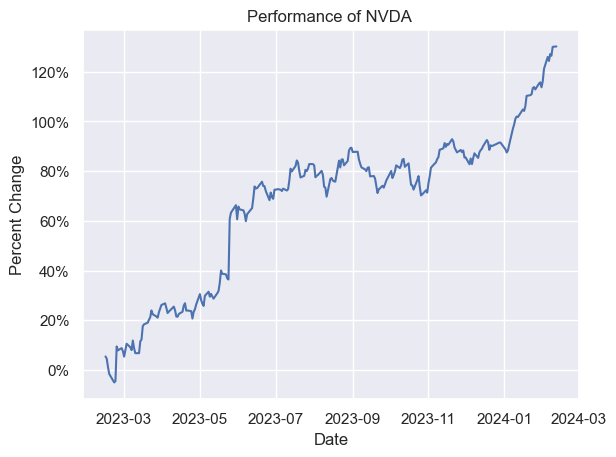

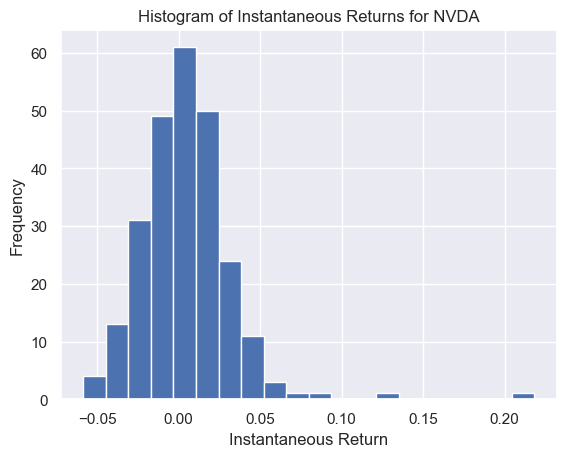

In [3]:
def main():
    # uncomment (remove pass) code below to test
    # test = Stock(symbol=[stock_symbol]) # optionally test custom data range
    test = Stock("NVDA")
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    

if __name__ == '__main__':
    main() 